In [1]:
import netCDF4

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import os

In [2]:
def plot_earth(view="EARTH"):
    # Create Big Figure
    plt.rcParams['figure.figsize'] = [25, 10]

    # create Projection and Map Elements
    projection = ccrs.PlateCarree()
    ax = plt.axes(projection=projection)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.STATES)
    ax.add_feature(cfeature.OCEAN, color="white")
    ax.add_feature(cfeature.LAND, color="lightgray")

    if view == "US":
        ax.set_xlim(-130, -65)
        ax.set_ylim(25, 50)
    elif view == "EAST US":
        ax.set_xlim(-105, -65)
        ax.set_ylim(25, 50)
    elif view == "EARTH":
        ax.set_xlim(-180, 180)
        ax.set_ylim(-90, 90)
    
    return projection

In [16]:
ROOT = '/Users/bram/Documents/Computational Science/Thesis/heatwave/data/NCEP-NCAR/surface'
OUT = 'air.sig995.tmean.nc'

# Fresh Start for OUT file
if os.path.exists(OUT): os.remove(OUT)
    
dataset = netCDF4.Dataset(OUT, 'w', format='NETCDF4_CLASSIC')

dataset.description = "NCEP/NCAR Reanalysis 1: Surface - TMEAN"

# Create Data Dimensions
dataset.createDimension('latitude', 73)
dataset.createDimension('longitude', 144)
dataset.createDimension('time', len(pd.date_range('1948-01-01', '2018-12-31')))

# Create Data Variables
latitude = dataset.createVariable('latitude', np.float32, ('latitude',))
longitude = dataset.createVariable('longitude', np.float32, ('longitude',))
time = dataset.createVariable('time', np.float64, ('time',))
T = dataset.createVariable('tmean', np.float32, ('time', 'latitude', 'longitude'))

latitude.units = 'degrees_north'
longitude.units = 'degrees_east'
time.units = 'days since 1948-01-01'
T.units = 'degrees Kelvin'

index = 0

# Write Individual Years to new Dataset
for source in sorted([source for source in os.listdir(ROOT) if source.endswith('.nc')]):
    
    print(f"\rWriting {source} to {OUT}", end="")
    
    data = netCDF4.Dataset(os.path.join(ROOT, source))
    
    if index == 0:
        latitude[:] = data['lat'][:]
        longitude[:] = data['lon'][:]
    
    # Load Data into DataFrame
    df = pd.DataFrame(data=data['air'][:].reshape(-1, len(latitude) * len(longitude)),
                      index=pd.to_datetime(data['time'][:], unit='h', origin="1800-01-01"))
    
#     # Calculate TMAX per Day
#     df = df.groupby([df.index.year, df.index.month, df.index.day]).max()
    
    time[index:index+len(df.index)] = range(index, index+len(df.index))
    T[index:index+len(df.index)] = df.values.reshape(-1, len(latitude), len(longitude))
    
    index += len(df.index)

Writing air.sig995.2018.nc to air.sig995.tmean.nc

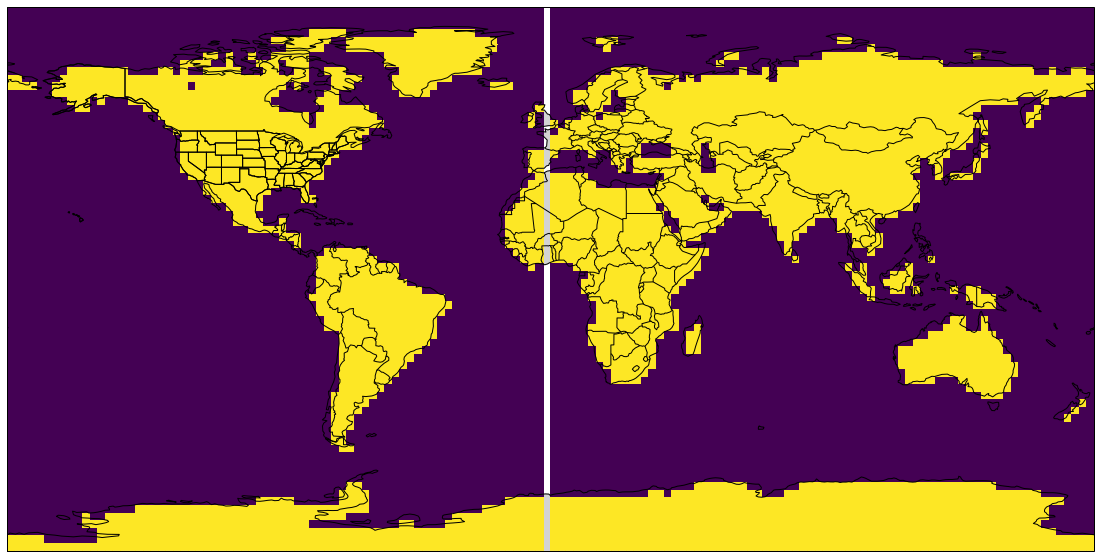

In [25]:
landseamask = netCDF4.Dataset('/Users/bram/Documents/Computational Science/Thesis/heatwave/data/NCEP-NCAR/land-sea-mask.nc')

plot_earth()
plt.pcolormesh(longitude, latitude, landseamask['land'][0])
plt.show()

In [21]:
dataset = netCDF4.Dataset('/Users/bram/Documents/Computational Science/Thesis/heatwave/data/NCEP-NCAR/air.sig995.tmean.nc')

pd.DataFrame(data=dataset['tmean'][:].reshape(len(dataset['time']), -1), 
             index=pd.to_datetime(dataset['time'][:], unit='D', origin='1948-01-01'))

,0,1,2,3,4,5,6,7,8,9,...,10502,10503,10504,10505,10506,10507,10508,10509,10510,10511
1948-01-01,238.100006,238.100006,238.100006,238.100006,238.100006,238.100006,238.100006,238.100006,238.100006,238.100006,...,255.700012,255.700012,255.700012,255.700012,255.700012,255.700012,255.700012,255.700012,255.700012,255.700012
1948-01-02,239.350006,239.350006,239.350006,239.350006,239.350006,239.350006,239.350006,239.350006,239.350006,239.350006,...,255.399994,255.399994,255.399994,255.399994,255.399994,255.399994,255.399994,255.399994,255.399994,255.399994
1948-01-03,237.350006,237.350006,237.350006,237.350006,237.350006,237.350006,237.350006,237.350006,237.350006,237.350006,...,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000
1948-01-04,239.100006,239.100006,239.100006,239.100006,239.100006,239.100006,239.100006,239.100006,239.100006,239.100006,...,257.750000,257.750000,257.750000,257.750000,257.750000,257.750000,257.750000,257.750000,257.750000,257.750000
1948-01-05,240.320007,240.320007,240.320007,240.320007,240.320007,240.320007,240.320007,240.320007,240.320007,240.320007,...,258.049988,258.049988,258.049988,258.049988,258.049988,258.049988,258.049988,258.049988,258.049988,258.049988
1948-01-06,243.600006,243.600006,243.600006,243.600006,243.600006,243.600006,243.600006,243.600006,243.600006,243.600006,...,257.970001,257.970001,257.970001,257.970001,257.970001,257.970001,257.970001,257.970001,257.970001,257.970001
1948-01-07,241.369995,241.369995,241.369995,241.369995,241.369995,241.369995,241.369995,241.369995,241.369995,241.369995,...,258.520020,258.520020,258.520020,258.520020,258.520020,258.520020,258.520020,258.520020,258.520020,258.520020
1948-01-08,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,...,259.450012,259.450012,259.450012,259.450012,259.450012,259.450012,259.450012,259.450012,259.450012,259.450012
1948-01-09,242.170013,242.170013,242.170013,242.170013,242.170013,242.170013,242.170013,242.170013,242.170013,242.170013,...,257.020020,257.020020,257.020020,257.020020,257.020020,257.020020,257.020020,257.020020,257.020020,257.020020
1948-01-10,237.700012,237.700012,237.700012,237.700012,237.700012,237.700012,237.700012,237.700012,237.700012,237.700012,...,256.220001,256.220001,256.220001,256.220001,256.220001,256.220001,256.220001,256.220001,256.220001,256.220001


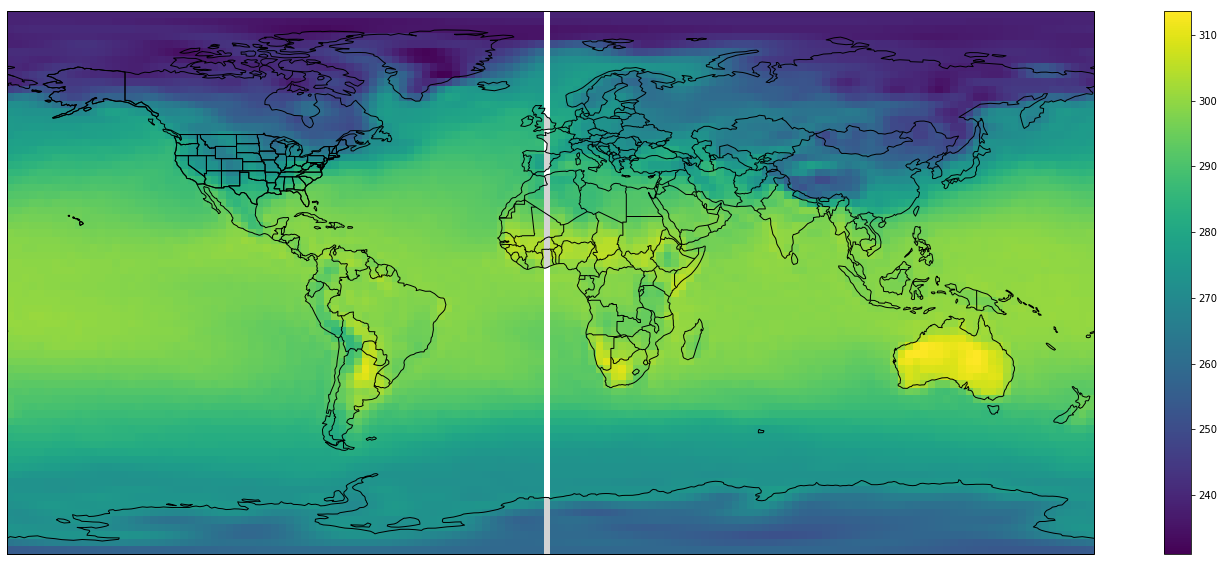

In [38]:
dataset = netCDF4.Dataset('/Users/bram/Documents/Computational Science/Thesis/heatwave/data/NCEP-NCAR/air.sig995.tmax.nc')

plot_earth()
plt.pcolormesh(longitude, latitude, dataset['tmax'][0])
plt.colorbar()
plt.show()

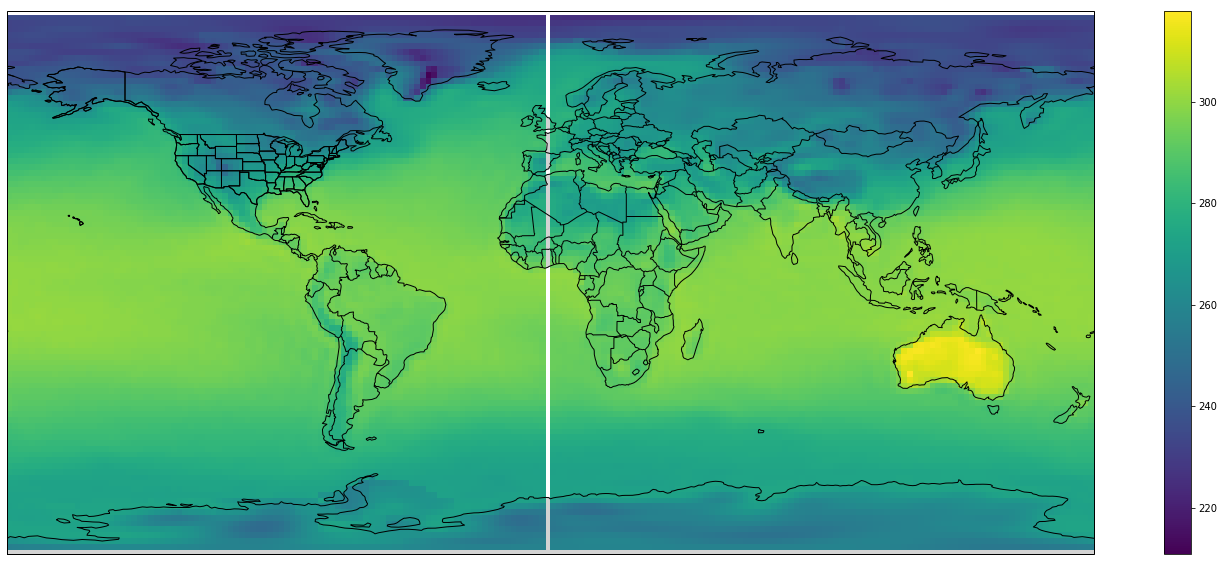

In [37]:
dataset = netCDF4.Dataset('/Users/bram/Downloads/air.2m.gauss.1948.nc')

plot_earth()
plt.pcolormesh(dataset['lon'][:], dataset['lat'][:], dataset['air'][0])
plt.colorbar()
plt.show()